In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("daily_internet_usage_by_age_group.csv")

data.head()

,user_id,date,age,age_group,social_media_hours,work_or_study_hours,entertainment_hours,total_screen_time,primary_device,internet_type
0,1,2024-04-02,15,13-18,2.2,3.7,2.4,8.3,Mobile,WiFi
1,2,2024-06-07,13,13-18,1.1,6.9,2.1,10.1,Tablet,WiFi
2,3,2024-04-03,21,19-25,1.3,5.7,1.6,8.6,Tablet,WiFi
3,4,2024-10-02,35,26-35,2.5,5.0,2.0,9.5,Mobile,WiFi
4,5,2024-10-05,49,46-60,0.2,6.3,2.8,9.3,Laptop,WiFi


In [5]:
data.info()
# Great, so no missing values and dtypes look correct.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              2800 non-null   int64  
 1   date                 2800 non-null   object 
 2   age                  2800 non-null   int64  
 3   age_group            2800 non-null   object 
 4   social_media_hours   2800 non-null   float64
 5   work_or_study_hours  2800 non-null   float64
 6   entertainment_hours  2800 non-null   float64
 7   total_screen_time    2800 non-null   float64
 8   primary_device       2800 non-null   object 
 9   internet_type        2800 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 218.9+ KB


In [6]:
data.describe()
# Average 

,user_id,age,social_media_hours,work_or_study_hours,entertainment_hours,total_screen_time
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1400.500000,38.397500,2.117143,4.016107,2.021929,8.155179
std,808.434702,18.436556,1.113908,1.722615,0.876120,2.211885
min,1.000000,13.000000,0.200000,1.000000,0.500000,2.000000
25%,700.750000,22.000000,1.100000,2.500000,1.300000,6.600000
50%,1400.500000,35.000000,2.100000,4.000000,2.000000,8.100000
75%,2100.250000,53.000000,3.100000,5.500000,2.800000,9.700000
max,2800.000000,75.000000,4.000000,7.000000,3.500000,14.000000


In [11]:
for col in data.columns:
    print(f"\n{col}:")
    print(data[col].unique())


user_id:
[   1    2    3 ... 2798 2799 2800]

date:
['2024-04-02' '2024-06-07' '2024-04-03' '2024-10-02' '2024-10-05'
 '2024-11-22' '2024-02-13' '2024-09-07' '2024-08-25' '2024-02-05'
 '2024-09-09' '2024-06-11' '2024-06-16' '2024-03-20' '2024-05-23'
 '2024-02-11' '2024-06-15' '2024-04-09' '2024-10-24' '2024-03-19'
 '2024-03-17' '2024-10-13' '2024-11-14' '2024-05-28' '2024-06-01'
 '2024-10-10' '2024-06-22' '2024-12-07' '2024-12-22' '2024-06-10'
 '2024-08-12' '2024-01-13' '2024-10-27' '2024-03-08' '2024-01-03'
 '2024-05-30' '2024-04-26' '2024-08-16' '2024-04-13' '2024-05-16'
 '2024-09-03' '2024-01-30' '2024-05-01' '2024-05-08' '2024-02-19'
 '2024-11-29' '2024-02-29' '2024-04-18' '2024-04-28' '2024-10-28'
 '2024-10-06' '2024-03-05' '2024-09-12' '2024-04-19' '2024-05-17'
 '2024-10-22' '2024-02-08' '2024-01-18' '2024-08-14' '2024-09-04'
 '2024-07-12' '2024-01-31' '2024-06-28' '2024-11-21' '2024-11-07'
 '2024-07-31' '2024-07-11' '2024-07-04' '2024-04-14' '2024-01-21'
 '2024-11-17' '2024-02-

In [15]:
# Data start date
data["date"].min()

'2024-01-01'

In [14]:
# Data end date
data["date"].max()

'2024-12-31'

In [17]:
# Youngest user
data["age"].min()

13

In [18]:
# Oldest user
data["age"].max()

75

In [ ]:
#--- DATA READY ---

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

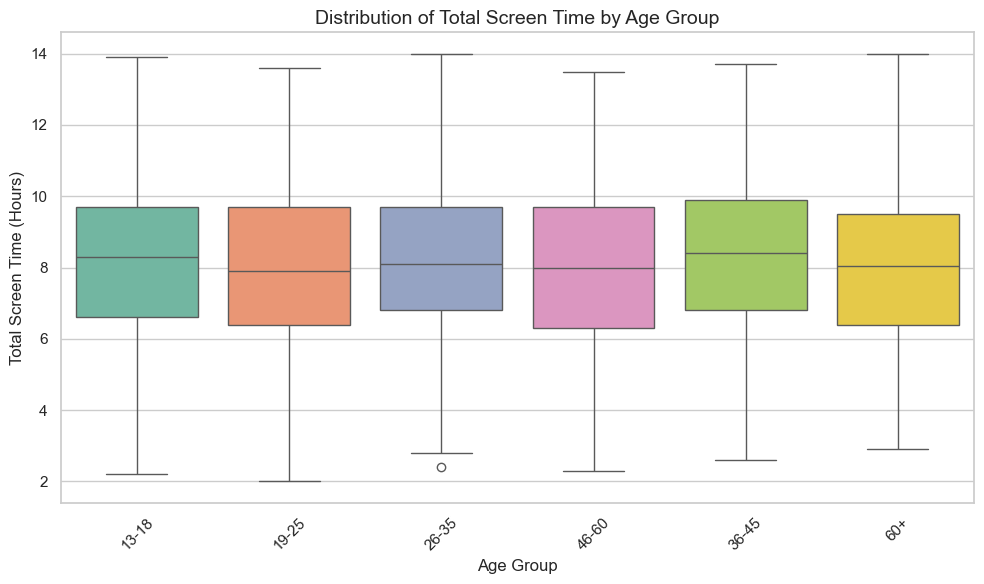

<Figure size 640x480 with 0 Axes>

In [26]:
# How does total screen time vary within age groups? (Boxplot / which users have higher variance)

# Variables: total_screen_time, age_group 

# Set style
sns.set(style="whitegrid")

# Create boxplot (Seaborn v0.14+ compatible)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data,
    x="age_group",
    y="total_screen_time",
    hue="age_group",
    palette="Set2",
    legend=False
)

# Titles and labels
plt.title("Distribution of Total Screen Time by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Total Screen Time (Hours)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
plt.clf()

In [29]:
# Is screen time composition different even when total time is similar? 

# Aggregate average hours by age group
usage_by_age = (
    data.groupby("age_group")[[
        "social_media_hours",
        "work_or_study_hours",
        "entertainment_hours"
    ]]
    .mean()
)

usage_by_age

,social_media_hours,work_or_study_hours,entertainment_hours
age_group,,,
13-18,2.103125,4.070536,2.036384
19-25,2.089727,3.904403,2.015933
26-35,2.139351,4.092901,1.997363
36-45,2.235991,4.063781,2.092711
46-60,2.053996,3.982073,2.023326
60+,2.086875,3.986667,1.973542


In [31]:
# Convert to percentages
usage_percent = usage_by_age.div(usage_by_age.sum(axis=1), axis=0) * 100
usage_percent

,social_media_hours,work_or_study_hours,entertainment_hours
age_group,,,
13-18,25.616487,49.579946,24.803567
19-25,26.088777,48.743719,25.167504
26-35,25.995761,49.733807,24.270433
36-45,26.642782,48.421681,24.935537
46-60,25.485730,49.409085,25.105186
60+,25.933309,49.541759,24.524931


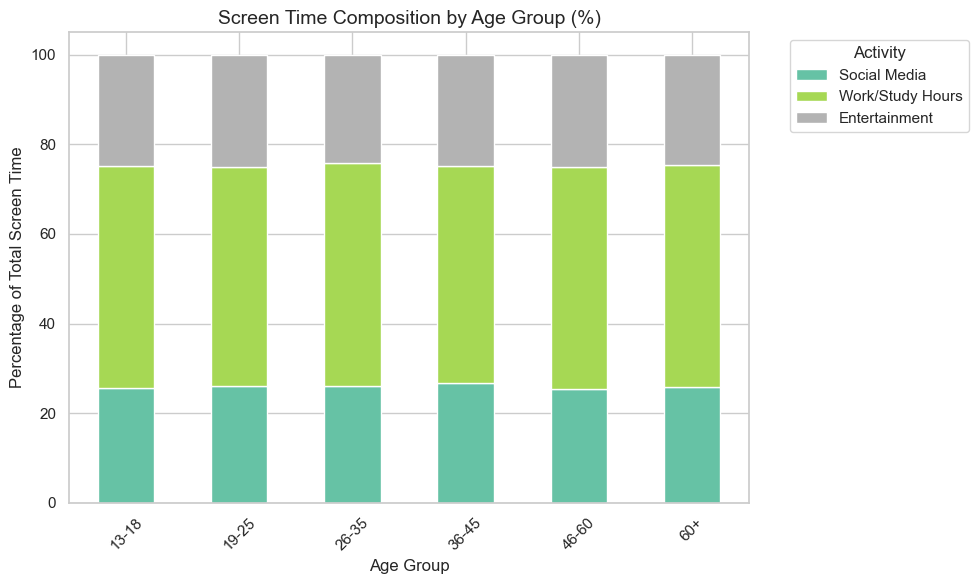

<Figure size 640x480 with 0 Axes>

In [60]:
# Calculate percentage composition of screen time by age group
usage_percent = (
    data_renamed.groupby('age_group')[["Social Media", "Work/Study Hours", "Entertainment"]]
    .mean()
)

# Convert to percentage of total screen time for each age group
usage_percent = usage_percent.div(usage_percent.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = usage_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="Set2"
)

# Titles and labels
plt.title("Screen Time Composition by Age Group (%)", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Percentage of Total Screen Time")
plt.xticks(rotation=45)
plt.legend(title="Activity", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()
plt.clf()

In [37]:
# Aggregate average usage by device
device_usage = (
    data.groupby("primary_device")[[
        "social_media_hours",
        "work_or_study_hours",
        "entertainment_hours"
    ]]
    .mean()
)

# Rename columns for presentation
device_usage = device_usage.rename(columns={
    "social_media_hours": "Social Media",
    "work_or_study_hours": "Work/Study Hours",
    "entertainment_hours": "Entertainment"
})

device_usage

,Social Media,Work/Study Hours,Entertainment
primary_device,,,
Laptop,2.062419,4.017063,2.013067
Mobile,2.113946,4.008757,2.020973
Tablet,2.173656,4.022339,2.031507


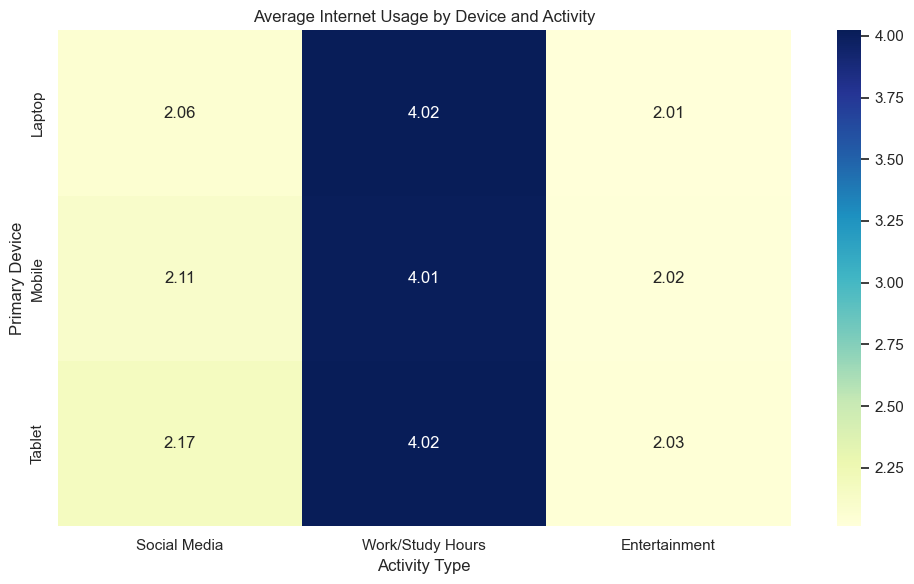

In [38]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    device_usage,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu"
)

plt.title("Average Internet Usage by Device and Activity")
plt.xlabel("Activity Type")
plt.ylabel("Primary Device")

plt.tight_layout()
plt.show()

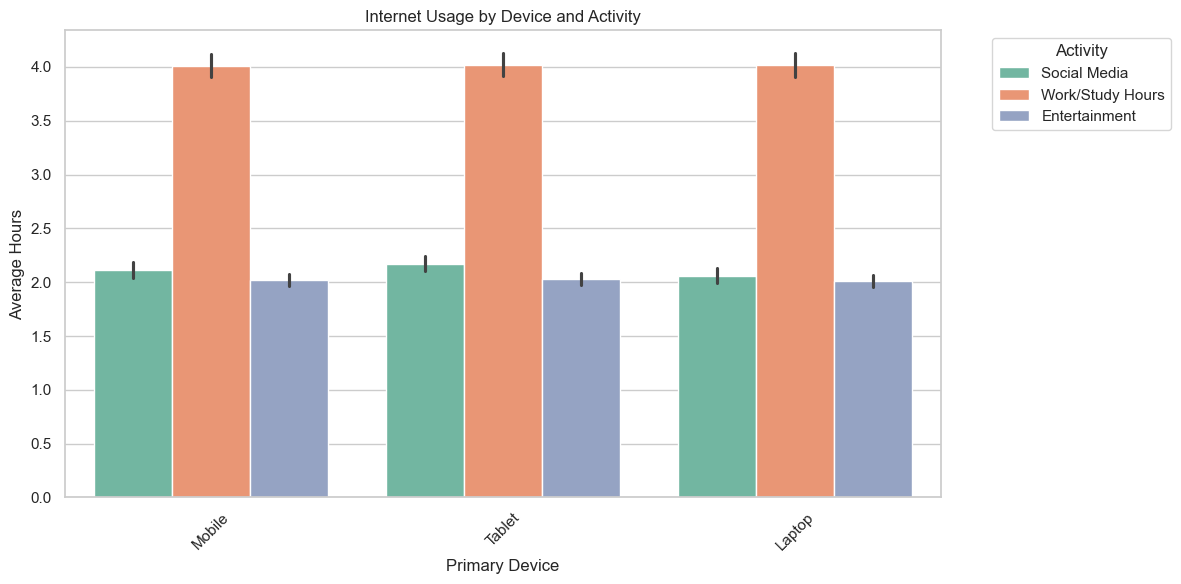

<Figure size 640x480 with 0 Axes>

In [41]:
# Reshape data for seaborn
melted = data.melt(
    id_vars="primary_device",
    value_vars=[
        "social_media_hours",
        "work_or_study_hours",
        "entertainment_hours"
    ],
    var_name="activity",
    value_name="hours"
)

# Rename activity labels for presentation
activity_labels = {
    "social_media_hours": "Social Media",
    "work_or_study_hours": "Work/Study Hours",
    "entertainment_hours": "Entertainment"
}

melted["activity"] = melted["activity"].map(activity_labels)

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=melted,
    x="primary_device",
    y="hours",
    hue="activity",
    palette="Set2"
)

plt.title("Internet Usage by Device and Activity")
plt.xlabel("Primary Device")
plt.ylabel("Average Hours")
plt.xticks(rotation=45)
plt.legend(title="Activity", bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()
plt.clf()

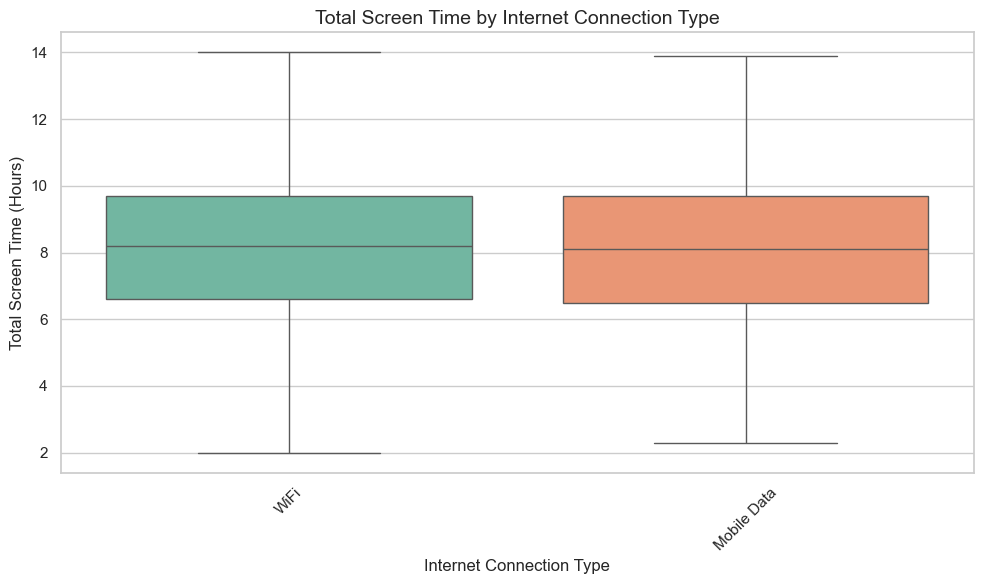

<Figure size 640x480 with 0 Axes>

In [42]:
# Does internet connection type relate to heavier usage?

# Create boxplot (Seaborn v0.14+ compatible)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data,
    x="internet_type",
    y="total_screen_time",
    hue="internet_type",
    palette="Set2",
    legend=False
)

# Titles and labels
plt.title("Total Screen Time by Internet Connection Type", fontsize=14)
plt.xlabel("Internet Connection Type")
plt.ylabel("Total Screen Time (Hours)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
plt.clf()

In [44]:
# Median screen time by internet type
data.groupby("internet_type")["total_screen_time"].median().sort_values(ascending=False)


internet_type
WiFi           8.2
Mobile Data    8.1
Name: total_screen_time, dtype: float64

In [45]:
# Variance in screen time by internet type
data.groupby("internet_type")["total_screen_time"].var().sort_values(ascending=False)


internet_type
Mobile Data    4.958313
WiFi           4.828625
Name: total_screen_time, dtype: float64

In [47]:
# Are weekends used differently than weekdays?

# Convert 'date' column to datetime if it isn't already
data['date'] = pd.to_datetime(data['date'])

# Create a new column for Weekday vs Weekend
data['day_type'] = data['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Aggregate average total screen time by day type
avg_screen_time = data.groupby('day_type')['total_screen_time'].mean().reset_index()

avg_screen_time

,day_type,total_screen_time
0,Weekday,8.167429
1,Weekend,8.123954


C:\Users\nashj\AppData\Local\Temp\ipykernel_7388\2667205934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


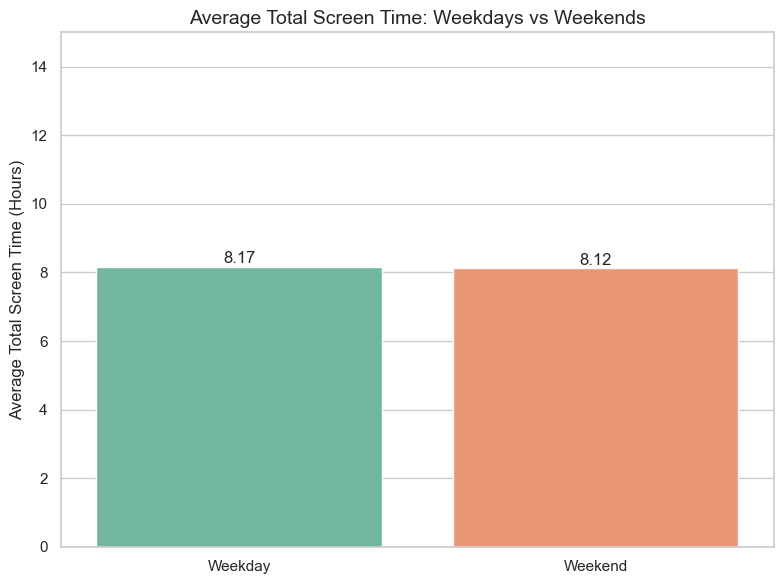

<Figure size 640x480 with 0 Axes>

In [48]:
# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(
    data=avg_screen_time,
    x='day_type',
    y='total_screen_time',
    palette='Set2'
)

plt.title('Average Total Screen Time: Weekdays vs Weekends', fontsize=14)
plt.xlabel('')
plt.ylabel('Average Total Screen Time (Hours)')
plt.ylim(0, data['total_screen_time'].max() + 1)  # optional: tidy y-axis

# Optional: add value labels on top of bars
for index, row in avg_screen_time.iterrows():
    plt.text(index, row.total_screen_time + 0.1, f"{row.total_screen_time:.2f}", ha='center')

plt.tight_layout()
plt.show()
plt.clf()

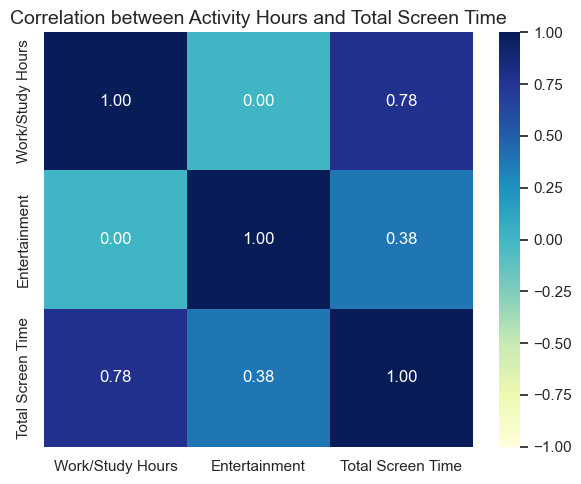

<Figure size 640x480 with 0 Axes>

In [51]:
# Rename columns for presentation clarity
data_renamed = data.rename(columns={
    "social_media_hours": "Social Media",
    "work_or_study_hours": "Work/Study Hours",
    "entertainment_hours": "Entertainment",
    "total_screen_time": "Total Screen Time"
})

# Select relevant columns
cols = ["Work/Study Hours", "Entertainment", "Total Screen Time"]

# Correlation matrix
corr = data_renamed[cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    vmin=-1, vmax=1
)
plt.title("Correlation between Activity Hours and Total Screen Time", fontsize=14)
plt.tight_layout()
plt.show()
plt.clf()

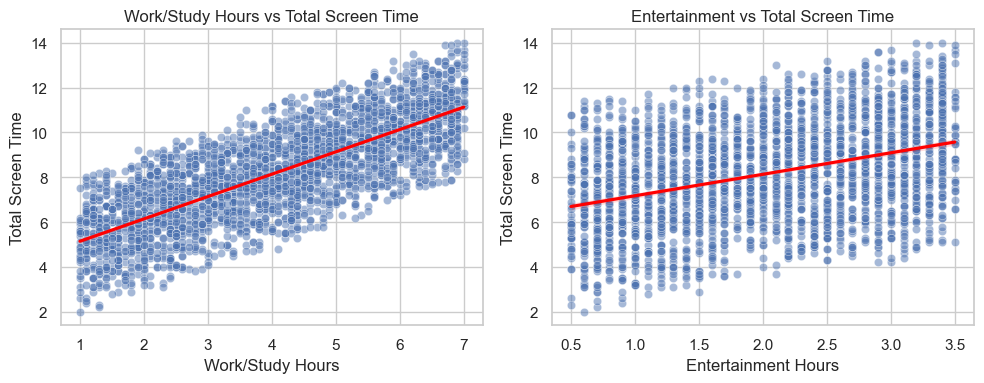

<Figure size 640x480 with 0 Axes>

In [52]:
# Scatterplots with trendlines
plt.figure(figsize=(10, 4))

# Work/Study Hours vs Total Screen Time
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=data_renamed,
    x="Work/Study Hours",
    y="Total Screen Time",
    alpha=0.5
)
sns.regplot(
    data=data_renamed,
    x="Work/Study Hours",
    y="Total Screen Time",
    scatter=False,
    color='red'
)
plt.title("Work/Study Hours vs Total Screen Time")
plt.xlabel("Work/Study Hours")
plt.ylabel("Total Screen Time")

# Entertainment vs Total Screen Time
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=data_renamed,
    x="Entertainment",
    y="Total Screen Time",
    alpha=0.5
)
sns.regplot(
    data=data_renamed,
    x="Entertainment",
    y="Total Screen Time",
    scatter=False,
    color='red'
)
plt.title("Entertainment vs Total Screen Time")
plt.xlabel("Entertainment Hours")
plt.ylabel("Total Screen Time")

plt.tight_layout()
plt.show()
plt.clf()

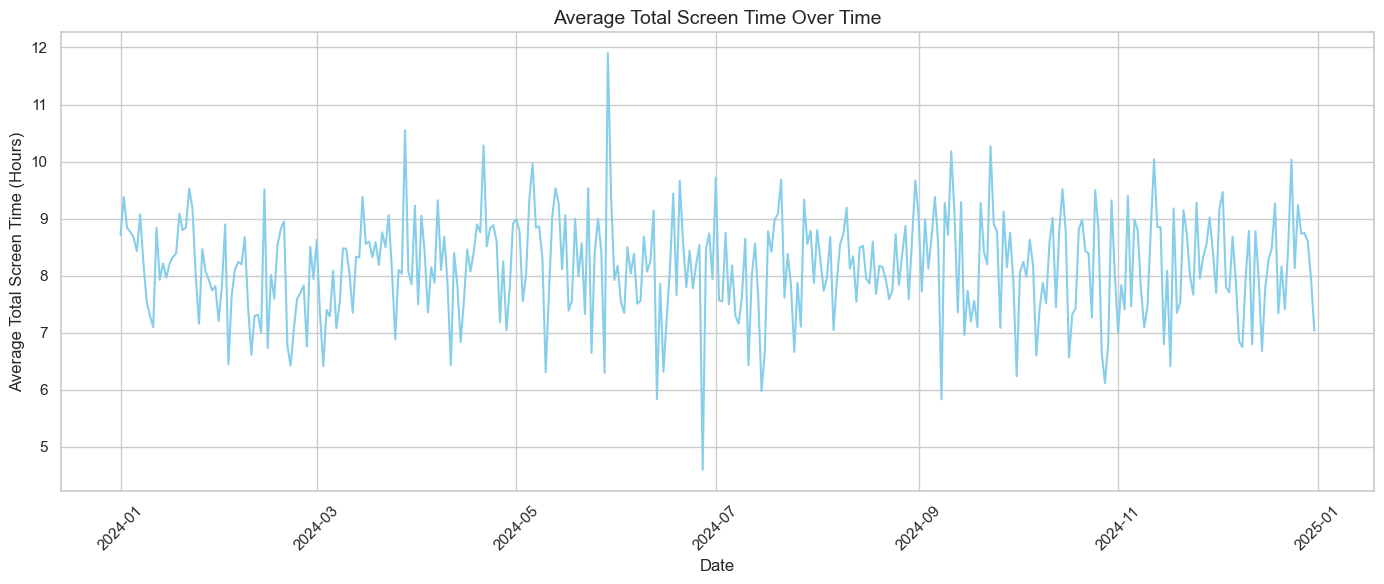

<Figure size 640x480 with 0 Axes>

In [55]:
# Rename columns for presentation clarity
data_renamed = data.rename(columns={
    "social_media_hours": "Social Media",
    "work_or_study_hours": "Work/Study Hours",
    "entertainment_hours": "Entertainment",
    "total_screen_time": "Total Screen Time"
})

# Convert 'date' to datetime
data_renamed['date'] = pd.to_datetime(data_renamed['date'])

# Aggregate average Total Screen Time by date
avg_total_time = data_renamed.groupby('date')['Total Screen Time'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=avg_total_time,
    x='date',
    y='Total Screen Time',
    color='skyblue'
)

plt.title('Average Total Screen Time Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Average Total Screen Time (Hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()

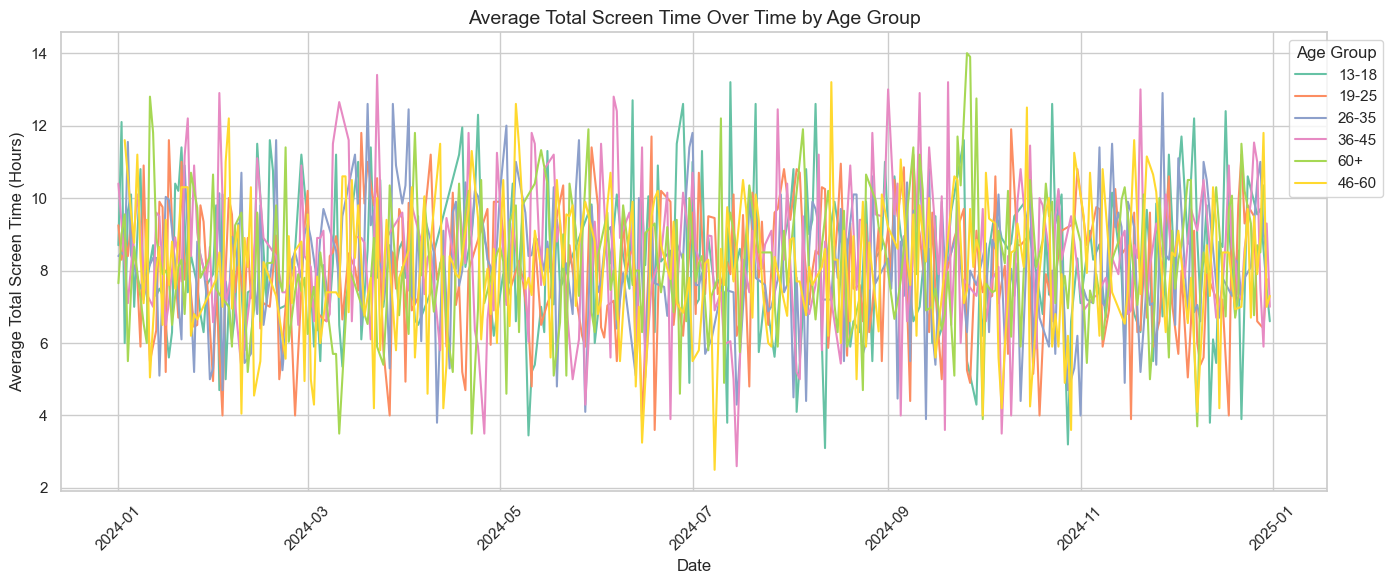

In [53]:
# Are there trends over time?
# Rename columns for presentation clarity
data_renamed = data.rename(columns={
    "social_media_hours": "Social Media",
    "work_or_study_hours": "Work/Study Hours",
    "entertainment_hours": "Entertainment",
    "total_screen_time": "Total Screen Time"
})

# Convert 'date' to datetime
data_renamed['date'] = pd.to_datetime(data_renamed['date'])

# Aggregate average Total Screen Time by date and age_group
avg_time_by_age = (
    data_renamed.groupby(['date', 'age_group'])['Total Screen Time']
    .mean()
    .reset_index()
)

# Plot line chart
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=avg_time_by_age,
    x='date',
    y='Total Screen Time',
    hue='age_group',
    palette='Set2'
)

plt.title('Average Total Screen Time Over Time by Age Group', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Average Total Screen Time (Hours)')
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [54]:
avg_time_by_age['Total Screen Time'] = avg_time_by_age.groupby('age_group')['Total Screen Time'].transform(lambda x: x.rolling(7, 1).mean())


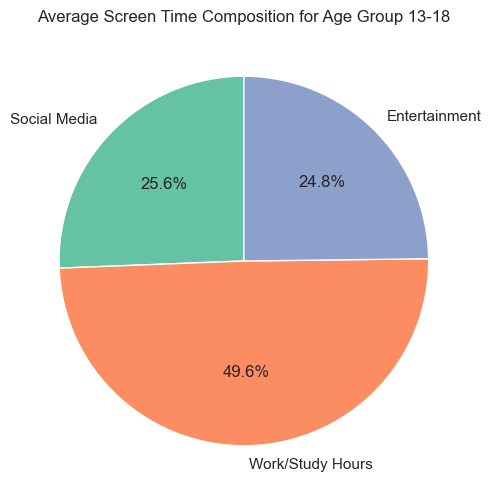

<Figure size 640x480 with 0 Axes>

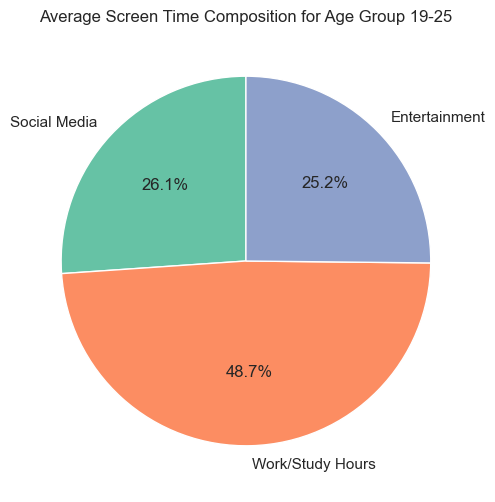

<Figure size 640x480 with 0 Axes>

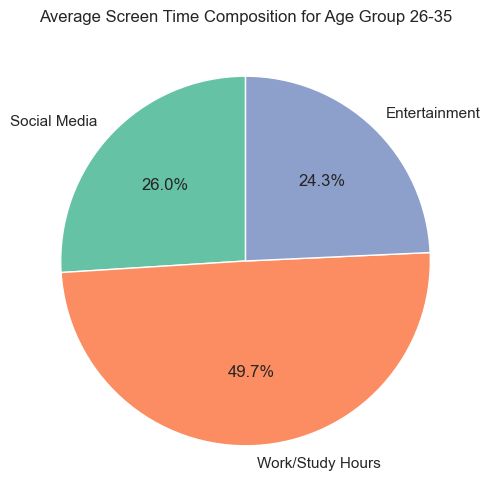

<Figure size 640x480 with 0 Axes>

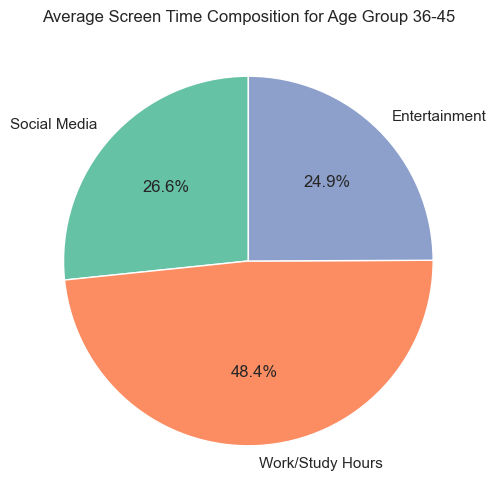

<Figure size 640x480 with 0 Axes>

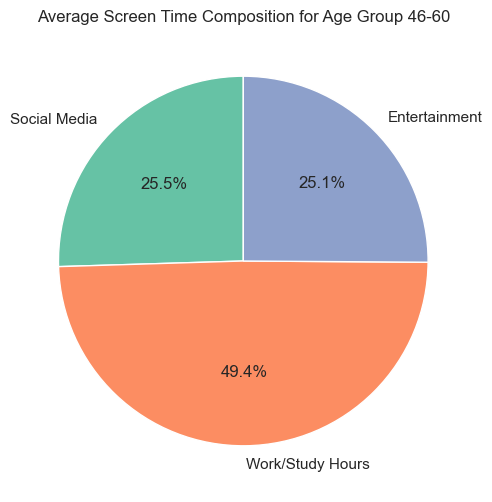

<Figure size 640x480 with 0 Axes>

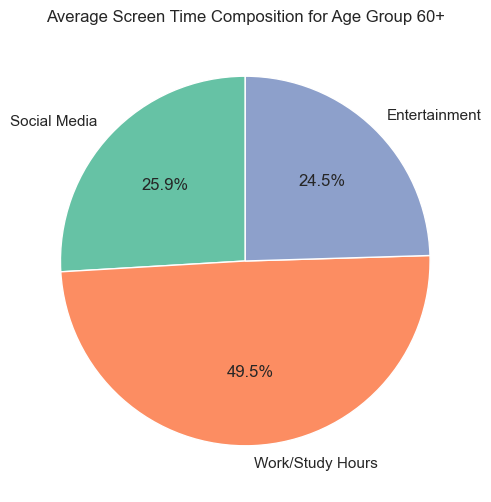

<Figure size 640x480 with 0 Axes>

In [59]:
# Rename columns for presentation clarity
data_renamed = data.rename(columns={
    "social_media_hours": "Social Media",
    "work_or_study_hours": "Work/Study Hours",
    "entertainment_hours": "Entertainment",
    "total_screen_time": "Total Screen Time"
})

# List of age groups in your dataset
age_groups = ['13-18', '19-25', '26-35', '36-45', '46-60', '60+']

# Colors for consistency
colors = ['#66c2a5','#fc8d62','#8da0cb']

# Loop through each age group and plot pie chart
for age_group in age_groups:
    subset = data_renamed[data_renamed['age_group'] == age_group]
    
    # Skip if no data for this age group
    if subset.empty:
        print(f"No data for age group {age_group}, skipping...")
        continue
    
    # Calculate average hours per activity
    activity_avg = subset[["Social Media", "Work/Study Hours", "Entertainment"]].mean().dropna()
    
    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        activity_avg,
        labels=activity_avg.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )
    plt.title(f"Average Screen Time Composition for Age Group {age_group}")
    plt.show()
    plt.clf()